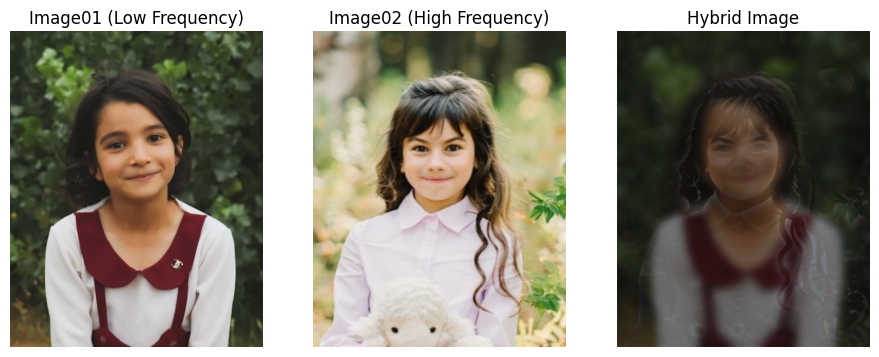

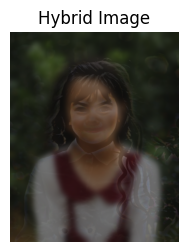

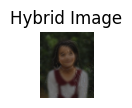

In [4]:
# import necessary libraries
import cv2  # for image processing
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt  # for visualizing results

# function to align two images by resizing them to the same dimensions
def align_images(image1, image2):
    # get the height and width of the first image
    height, width = image1.shape[:2]
    # resize the second image to match the dimensions of the first
    image2 = cv2.resize(image2, (width, height))
    return image1, image2

# function to apply a low-pass filter using a gaussian blur
def apply_low_pass_filter(image, sigma):
    return cv2.GaussianBlur(image, (0, 0), sigma)

# function to apply a high-pass filter by subtracting low frequencies
def apply_high_pass_filter(image, sigma):
    # blur the image to get low frequencies
    low_frequencies = cv2.GaussianBlur(image, (0, 0), sigma)
    # subtract low frequencies from the original image to get high frequencies
    return cv2.subtract(image, low_frequencies)

# function to create a hybrid image by combining low and high frequencies from two images
def create_hybrid_image_rgb(image_low_freq, image_high_freq, low_cutoff, high_cutoff):
    # split the RGB channels of the low-frequency image
    low_freq_channels = cv2.split(image_low_freq)
    # split the RGB channels of the high-frequency image
    high_freq_channels = cv2.split(image_high_freq)

    hybrid_channels = []  # list to store the combined channels

    # loop through each color channel pair (low and high frequencies)
    for low_channel, high_channel in zip(low_freq_channels, high_freq_channels):
        # apply low-pass filter to the low-frequency channel
        low_frequencies = apply_low_pass_filter(low_channel, low_cutoff)
        # apply high-pass filter to the high-frequency channel
        high_frequencies = apply_high_pass_filter(high_channel, high_cutoff)
        # combine the two channels with equal weights
        hybrid_channel = cv2.addWeighted(low_frequencies, 0.5, high_frequencies, 0.5, 0)
        # add the resulting channel to the list
        hybrid_channels.append(hybrid_channel)

    # merge the combined channels back into an RGB image
    hybrid_image = cv2.merge(hybrid_channels)
    return hybrid_image

# load the first and second images
image1 = cv2.imread("image01.jpg")  # path to the first image
image2 = cv2.imread("image02.jpg")  # path to the second image

# check if images are loaded correctly
if image1 is None or image2 is None:
    print("Error: One or both images not found. Check file paths.")
    exit()

# align the two images to ensure they have the same dimensions
dog_image, cat_image = align_images(image1, image2)

# set cutoff frequencies for the filters
low_cutoff_frequency = 7  # for low-pass filter
high_cutoff_frequency = 7  # for high-pass filter

# create the hybrid image by combining the two images
hybrid_image = create_hybrid_image_rgb(
    dog_image, cat_image, low_cutoff_frequency, high_cutoff_frequency
)

# display the original images and the hybrid image
plt.figure(figsize=(15, 10))

# show the first image (low frequency)
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(dog_image, cv2.COLOR_BGR2RGB))
plt.title("Image01 (Low Frequency)")
plt.axis("off")

# show the second image (high frequency)
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(cat_image, cv2.COLOR_BGR2RGB))
plt.title("Image02 (High Frequency)")
plt.axis("off")

# show the resulting hybrid image
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(hybrid_image, cv2.COLOR_BGR2RGB))
plt.title("Hybrid Image")
plt.axis("off")

# result hybrid image in small size to show the difference
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(hybrid_image, cv2.COLOR_BGR2RGB))
plt.title("Hybrid Image")
plt.axis("off")

# resulting hybrid image in small size
plt.figure(figsize=(5, 2))
plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(hybrid_image, cv2.COLOR_BGR2RGB))
plt.title("Hybrid Image")
plt.axis("off")

# adjust layout and display the plot
plt.tight_layout()
plt.show()
